In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn_extra.cluster import KMedoids
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

Loans_Training = pd.read_csv('Loans_Training.txt', delimiter = ",")
Loans_Test = pd.read_csv('Loans_Test.txt', delimiter = ",")

print(Loans_Training.shape)
print(Loans_Test.shape)
Loans_Training.head()

Loans_Training.isna().any()

x = Loans_Training.iloc[:,1:4]
x.columns

y = Loans_Test.iloc[:,1:4]
y.columns

sc = StandardScaler()
x_scaled = sc.fit_transform(x)
y_scaled = sc.fit_transform(y)


ModuleNotFoundError: No module named 'sklearn_extra'

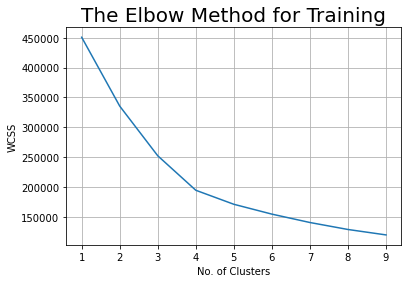

In [69]:
# K-MEANS for Training Data

wcss = []
for i in range(1, 10):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    preds = km.fit_predict(x_scaled)
    #silhouette = silhouette_score(x_scaled,preds)
    #print("Clusters = "+i+" Average Silhouette = "+silhouette)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method for Training', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

Clusters = 2: Silhouette = 0.294
Clusters = 3: Silhouette = 0.319
Clusters = 4: Silhouette = 0.335
Clusters = 5: Silhouette = 0.265
Clusters = 6: Silhouette = 0.248
Clusters = 7: Silhouette = 0.246
Clusters = 8: Silhouette = 0.248
Clusters = 9: Silhouette = 0.25
Clusters = 10: Silhouette = 0.255


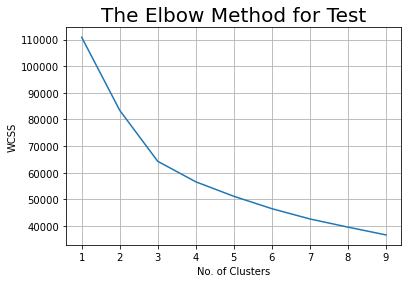

In [88]:
# K-MEANS for Test Data

wcss2 = []
silhouette_coefficients = []
for i in range(2, 11):
    km2 = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km2.fit(y_scaled)
    score = silhouette_score(y_scaled,km2.labels_)
    print("Clusters = "+str(i)+": Silhouette = "+str(round(score,3)))
    silhouette_coefficients.append(score)
    wcss2.append(km2.inertia_)
    
plt.plot(range(1, 10), wcss2)
plt.title('The Elbow Method for Test', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

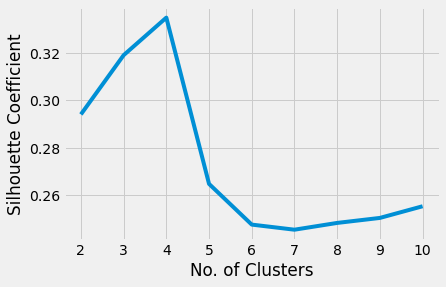

In [92]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("No. of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [81]:
#Training
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(x_scaled)
clusters = km.predict(x_scaled)
df = pd.concat([Loans_Training.reset_index(),pd.DataFrame(clusters,columns = ['clusters']).reset_index()],axis = 1)
df.drop(['index'],axis =1, inplace = True)
print(df['clusters'].value_counts())
df.to_csv('Kmeans_training.csv',index = False)


#Test
km2 = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km2.fit(y_scaled)
clusters2 = km2.predict(y_scaled)
df2 = pd.concat([Loans_Test.reset_index(),pd.DataFrame(clusters2,columns = ['clusters']).reset_index()],axis = 1)
df2.drop(['index'],axis =1, inplace = True)
print(df2['clusters'].value_counts())
df2.to_csv('Kmeans_test.csv',index = False)

2    75377
0    36905
3    21834
1    16186
Name: clusters, dtype: int64
1    25049
2    12162
3     7202
0     5285
Name: clusters, dtype: int64


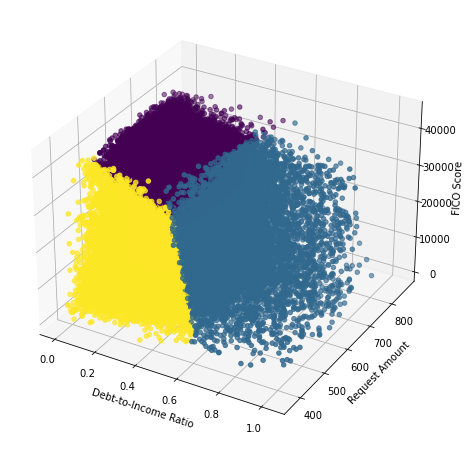

Training Data


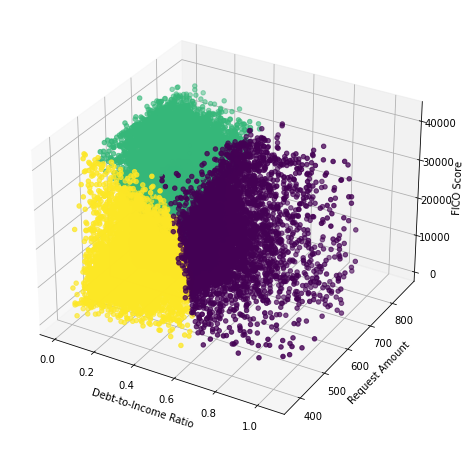

Test Data


In [85]:
fig = plt.figure(figsize=(30,8))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(df['Debt-to-Income Ratio'], df['FICO Score'], df['Request Amount'], c=df.clusters)
ax.set_xlabel('Debt-to-Income Ratio')
ax.set_ylabel('Request Amount')
ax.set_zlabel('FICO Score')
plt.show()
print("Training Data")

fig2 = plt.figure(figsize=(30,8))
ax = fig2.add_subplot(131, projection='3d')
ax.scatter(df2['Debt-to-Income Ratio'], df2['FICO Score'], df2['Request Amount'], c=df2.clusters)
ax.set_xlabel('Debt-to-Income Ratio')
ax.set_ylabel('Request Amount')
ax.set_zlabel('FICO Score')
plt.show()
print("Test Data")

Training Data


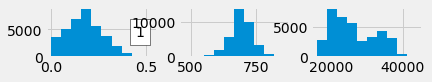

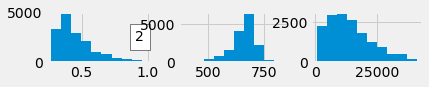

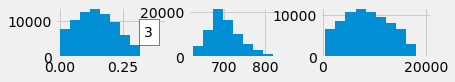

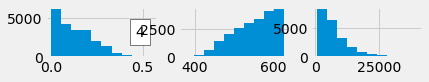

In [123]:
import matplotlib.gridspec as gridspec
from matplotlib.offsetbox import AnchoredText


print("Training Data")
gs = gridspec.GridSpec(4, 3)
for i in range(0,4):
    cluster = df.loc[df['clusters'] == i]
    
    plt.figure()
    anchored_text = AnchoredText(str(i+1), loc=7)
    ax = plt.subplot(gs[i, 0])
    ax.hist(cluster['Debt-to-Income Ratio'])
    ax.add_artist(anchored_text)
    plt.plot()
    ax = plt.subplot(gs[i, 1]) 
    ax.hist(cluster['FICO Score'])
    plt.plot()
    ax = plt.subplot(gs[i, 2])
    ax.hist(cluster['Request Amount'])
    plt.plot()

Test Data


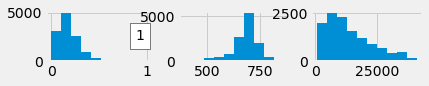

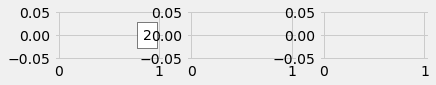

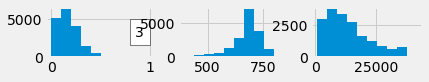

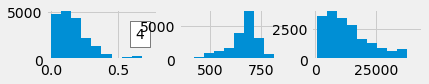

In [128]:
print("Test Data")
gs = gridspec.GridSpec(4, 3)
for i in range(0,4):
    cluster = df2.loc[df['clusters'] == i]
    
    plt.figure()
    anchored_text = AnchoredText(str(i+1), loc=7)
    ax = plt.subplot(gs[i, 0])
    ax.hist(cluster['Debt-to-Income Ratio'])
    ax.add_artist(anchored_text)
    plt.plot()
    ax = plt.subplot(gs[i, 1]) 
    ax.hist(cluster['FICO Score'])
    plt.plot()
    ax = plt.subplot(gs[i, 2])
    ax.hist(cluster['Request Amount'])
    plt.plot()